In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
with open('/kaggle/input/textfi/FINAL_Gamma_Tau.txt','r') as f:
    f_content= f.read()
    print(type(f_content))

<class 'str'>


In [2]:
print(f_content[:1500])

    0.0000   20.0000
    0.0000   20.0000
    0.0000   20.0000
    0.0001   20.0000
    0.0002   20.0131
    0.0003   20.0372
    0.0004   20.0627
    0.0004   20.0886
    0.0005   20.1153
    0.0006   20.1427
    0.0006   20.1704
    0.0007   20.1983
    0.0007   20.2263
    0.0008   20.2543
    0.0009   20.2824
    0.0009   20.3104
    0.0010   20.3384
    0.0010   20.3665
    0.0011   20.3947
    0.0011   20.4229
    0.0012   20.4512
    0.0012   20.4797
    0.0013   20.5083
    0.0013   20.5369
    0.0014   20.5656
    0.0014   20.5943
    0.0014   20.6230
    0.0015   20.6518
    0.0015   20.6805
    0.0016   20.7092
    0.0016   20.7379
    0.0017   20.7665
    0.0017   20.7952
    0.0018   20.8238
    0.0018   20.8524
    0.0019   20.8810
    0.0019   20.9096
    0.0020   20.9382
    0.0020   20.9667
    0.0021   20.9952
    0.0021   21.0237
    0.0022   21.0522
    0.0022   21.0807
    0.0023   21.1091
    0.0023   21.1376
    0.0024   21.1660
    0.0024   21.1944
    0.0025   

In [3]:
import re

In [4]:
regex = r"^    0\.\d+"
matches = re.finditer(regex, f_content, re.MULTILINE)

In [5]:
shear_strain=[]
for matchNum, match in enumerate(matches, start=1):
    stringg=match.group()
    shear_strain.append(float(stringg.strip()))

In [6]:
shear_strain[:30]

[0.0,
 0.0,
 0.0,
 0.0001,
 0.0002,
 0.0003,
 0.0004,
 0.0004,
 0.0005,
 0.0006,
 0.0006,
 0.0007,
 0.0007,
 0.0008,
 0.0009,
 0.0009,
 0.001,
 0.001,
 0.0011,
 0.0011,
 0.0012,
 0.0012,
 0.0013,
 0.0013,
 0.0014,
 0.0014,
 0.0014,
 0.0015,
 0.0015,
 0.0016]

In [7]:
len(shear_strain)

5001

In [8]:
regex = r'[2-7]\d\.[0-9]*'
matches = re.finditer(regex, f_content, re.MULTILINE)

In [9]:
shear_stress=[]
for matchNum, match in enumerate(matches, start=1):
    stringg=match.group()
    shear_stress.append(float(stringg.strip()))

In [10]:
shear_stress[:30]

[20.0,
 20.0,
 20.0,
 20.0,
 20.0131,
 20.0372,
 20.0627,
 20.0886,
 20.1153,
 20.1427,
 20.1704,
 20.1983,
 20.2263,
 20.2543,
 20.2824,
 20.3104,
 20.3384,
 20.3665,
 20.3947,
 20.4229,
 20.4512,
 20.4797,
 20.5083,
 20.5369,
 20.5656,
 20.5943,
 20.623,
 20.6518,
 20.6805,
 20.7092]

In [11]:
len(shear_stress)

5001

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
shear_strain=np.array(shear_strain)
shear_stress=np.array(shear_stress)

In [14]:
df=pd.DataFrame({"Shear Strain":(shear_strain),"Shear Stress":(shear_stress)})

In [15]:
df.head(10)

,Shear Strain,Shear Stress
0,0.0000,20.0000
1,0.0000,20.0000
2,0.0000,20.0000
3,0.0001,20.0000
4,0.0002,20.0131
5,0.0003,20.0372
6,0.0004,20.0627
7,0.0004,20.0886
8,0.0005,20.1153
9,0.0006,20.1427


<AxesSubplot: xlabel='Shear Strain'>

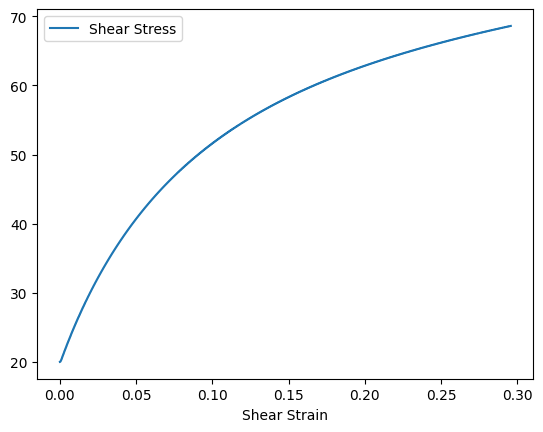

In [16]:
df.plot('Shear Strain','Shear Stress')

In [17]:
df.describe()

,Shear Strain,Shear Stress
count,5001.000000,5001.000000
mean,0.143547,53.419184
std,0.086564,13.005140
min,0.000000,20.000000
25%,0.067100,45.136600
50%,0.141800,57.393200
75%,0.218700,64.210300
max,0.295700,68.609300


In [18]:
"""
Theta0  is 10 - 1000 MPa
Theta infinity is 10 to 100 MPa
Tauc0   is  0 - 100 MPa
Taus is 50 - 150 MPa

also,
tauc0>taus
theta0>theta infinity
"""

'\nTheta0  is 10 - 1000 MPa\nTheta infinity is 10 to 100 MPa\nTauc0   is  0 - 100 MPa\nTaus is 50 - 150 MPa\n\nalso,\ntauc0>taus\ntheta0>theta infinity\n'

In [19]:
the0,theinf,tauco,taus=[],[],[],[]
for i in range(40):
    theinf.append(np.random.rand()*90)
    tauco.append(np.random.rand()*100)

In [20]:
theinf=np.array(theinf)
tauco=np.array(tauco)

In [21]:
theinf=theinf+10

In [22]:
for i in range(40):
    value0=np.random.rand()*(1000-theinf[i])
    value0=value0+theinf[i]
    the0.append(value0)
    if tauco[i]>50:
        values=np.random.rand()*(150-tauco[i])
        values=values+tauco[i]
        taus.append(values)
    else:
        values=np.random.rand()*100
        taus.append(values+50)

In [23]:
the0=np.array(the0)
taus=np.array(taus)

In [24]:
print('range of theta0 is from '+str(np.min(the0))+' to '+str(np.max(the0)))
print('range of theta inf is from '+str(np.min(theinf))+' to '+str(np.max(theinf)))
print('range of tauc0 is from '+str(np.min(tauco))+' to '+str(np.max(tauco)))
print('range of taus is from '+str(np.min(taus))+' to '+str(np.max(taus)))

range of theta0 is from 63.61801516372664 to 995.0546187636194
range of theta inf is from 10.76714291606608 to 97.73683842304199
range of tauc0 is from 0.324651716667157 to 99.72579099449227
range of taus is from 50.279432074984435 to 148.61343286682768


In [25]:
the0>theinf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [26]:
taus>tauco

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Text(0.5, 0, 'frequency of theta inf from 10.76714291606608 to 97.73683842304199')

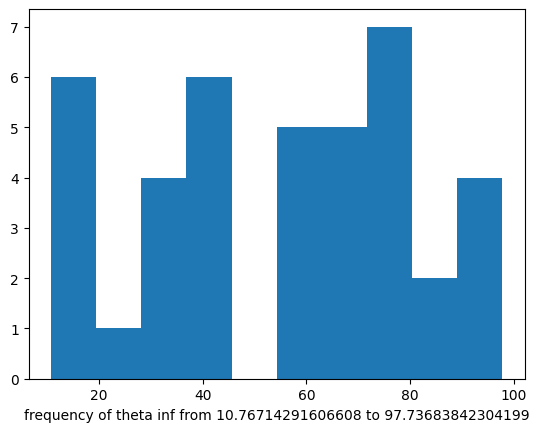

In [27]:
plt.hist(theinf)
label='frequency of theta inf from '+str(np.min(theinf))+' to '+str(np.max(theinf))
plt.xlabel(label)

Text(0.5, 0, 'frequency of theta0 from 63.61801516372664 to 995.0546187636194')

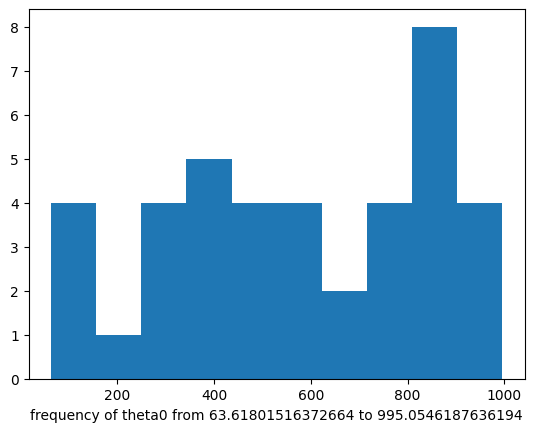

In [28]:
plt.hist(the0)
label='frequency of theta0 from '+str(np.min(the0))+' to '+str(np.max(the0))
plt.xlabel(label)

Text(0.5, 0, 'frequency of tauc0 from 0.324651716667157 to 99.72579099449227')

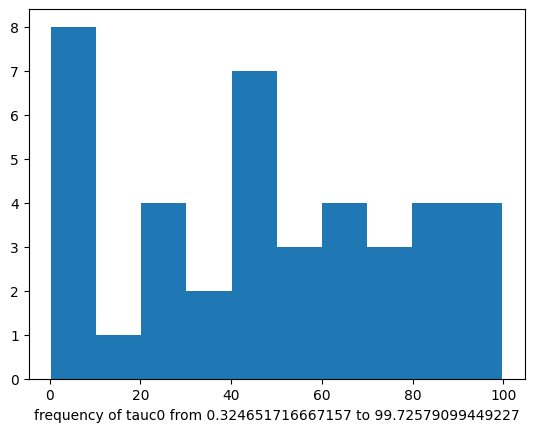

In [29]:
plt.hist(tauco)
label='frequency of tauc0 from '+str(np.min(tauco))+' to '+str(np.max(tauco))
plt.xlabel(label)

Text(0.5, 0, 'frequency of taus from 50.279432074984435 to 148.61343286682768')

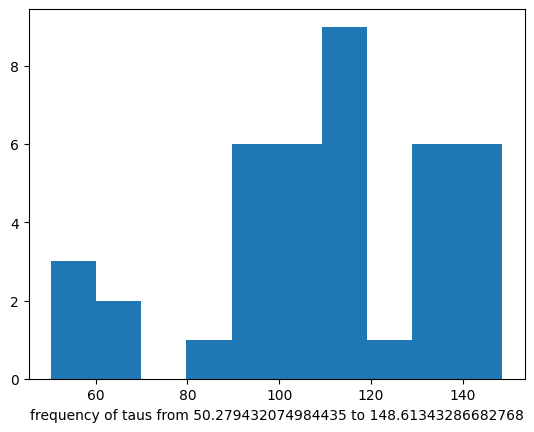

In [30]:
plt.hist(taus)
label='frequency of taus from '+str(np.min(taus))+' to '+str(np.max(taus))
plt.xlabel(label)

In [31]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [34]:
new_the0,new_theinf,new_tauco,new_taus,new_mae,new_rmse=[],[],[],[],[],[]

In [ ]:
i=0
for a in the0:
    print(i)
    i=i+1
    for b in theinf:
        for c in tauco:
            for d in taus:
                new_the0.append(a)
                new_theinf.append(b)
                new_tauco.append(c)
                new_taus.append(d)
                calc_stress=c+(d-c)*(1-np.exp(-1*a*shear_strain/d))+b*shear_strain
                new_mae.append(mae(shear_stress,calc_stress))
                new_rmse.append(np.sqrt(mse(shear_stress,calc_stress)))

In [202]:
new_the0=np.array(new_the0)
new_theinf=np.array(new_theinf)
new_tauco=np.array(new_tauco)
new_taus=np.array(new_taus)
new_mae=np.array(new_mae)
new_rmse=np.array(new_rmse)

In [203]:
final_df=pd.DataFrame({'the0':new_the0,'theinf':new_theinf,'tauco':new_tauco,'taus':new_taus,'MAE':new_mae,'RMSE':new_rmse})
final_df

,the0,theinf,tauco,taus,MAE,RMSE
0,744.704180,81.249451,67.247881,108.428107,48.478016,48.735378
1,744.704180,81.249451,67.247881,104.620942,46.742021,46.935625
2,744.704180,81.249451,67.247881,114.586908,51.151221,51.530969
3,744.704180,81.249451,67.247881,101.990589,45.503223,45.659373
4,744.704180,81.249451,67.247881,114.450436,51.093717,51.470538
...,...,...,...,...,...,...
2559995,276.198616,77.310228,15.441072,135.118391,9.228038,10.903474
2559996,276.198616,77.310228,15.441072,147.587445,9.696374,11.614745
2559997,276.198616,77.310228,15.441072,92.687079,7.383031,8.216440
2559998,276.198616,77.310228,15.441072,94.871721,7.476512,8.339324


In [204]:
final_df.describe()

,the0,theinf,tauco,taus,MAE,RMSE
count,2.560000e+06,2.560000e+06,2.560000e+06,2.560000e+06,2.560000e+06,2.560000e+06
mean,5.164879e+02,5.813787e+01,5.642083e+01,1.085770e+02,3.429267e+01,3.548094e+01
std,2.947178e+02,2.754716e+01,2.911281e+01,2.212696e+01,1.775218e+01,1.735084e+01
min,2.792221e+01,1.065192e+01,7.121431e+00,6.604482e+01,3.220667e-01,4.387756e-01
25%,2.783458e+02,3.082178e+01,2.626470e+01,9.340444e+01,1.971196e+01,2.143345e+01
50%,4.206638e+02,6.606833e+01,6.080168e+01,1.063572e+02,3.443042e+01,3.578546e+01
75%,8.477910e+02,8.191537e+01,8.266559e+01,1.193048e+02,4.775168e+01,4.858604e+01
max,9.873118e+02,9.769126e+01,9.960212e+01,1.499876e+02,8.770541e+01,8.810145e+01


In [205]:
final_df.to_csv('final_explo_shear.csv')

In [32]:
df=pd.read_csv('/kaggle/input/datacsv/final_explo_shear (1).csv')
df.head()

,Unnamed: 0,the0,theinf,tauco,taus,MAE,RMSE
0,0,744.70418,81.249451,67.247881,108.428107,48.478016,48.735378
1,1,744.70418,81.249451,67.247881,104.620942,46.742021,46.935625
2,2,744.70418,81.249451,67.247881,114.586908,51.151221,51.530969
3,3,744.70418,81.249451,67.247881,101.990589,45.503223,45.659373
4,4,744.70418,81.249451,67.247881,114.450436,51.093717,51.470538


In [33]:
df.columns

Index(['Unnamed: 0', 'the0', 'theinf', 'tauco', 'taus', 'MAE', 'RMSE'], dtype='object')

In [34]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(10)

,the0,theinf,tauco,taus,MAE,RMSE
0,744.70418,81.249451,67.247881,108.428107,48.478016,48.735378
1,744.70418,81.249451,67.247881,104.620942,46.742021,46.935625
2,744.70418,81.249451,67.247881,114.586908,51.151221,51.530969
3,744.70418,81.249451,67.247881,101.990589,45.503223,45.659373
4,744.70418,81.249451,67.247881,114.450436,51.093717,51.470538
5,744.70418,81.249451,67.247881,81.464347,34.586027,34.760371
6,744.70418,81.249451,67.247881,146.089250,62.635430,63.829888
7,744.70418,81.249451,67.247881,72.809188,29.217952,29.705234
8,744.70418,81.249451,67.247881,116.558716,51.973613,52.396609
9,744.70418,81.249451,67.247881,100.727606,44.896563,45.036916


In [35]:
x=df.iloc[np.argmin(df['RMSE'])]
x

the0      663.302830
theinf     15.208788
tauco      21.748972
taus       66.044817
MAE         0.330428
RMSE        0.438776
Name: 1691699, dtype: float64

In [36]:
y=df.iloc[np.argmin(df['MAE'])]
y

the0      663.302830
theinf     15.208788
tauco      22.118299
taus       66.044817
MAE         0.322067
RMSE        0.458808
Name: 1691659, dtype: float64

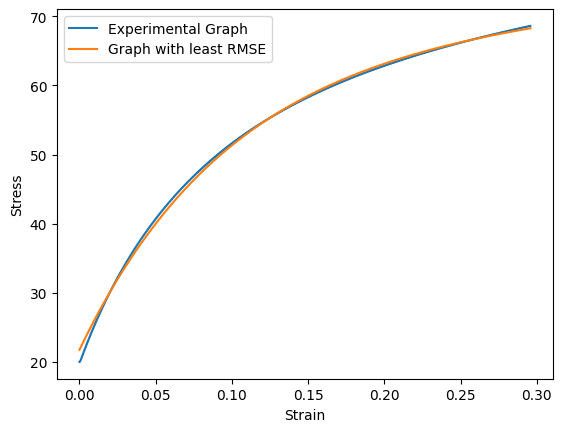

In [37]:
plt.plot(shear_strain,shear_stress,label='Experimental Graph')
plt.xlabel('Strain')
plt.ylabel('Stress')
c=x[2];d=x[3];a=x[0];b=x[1]
calc_stress=c+(d-c)*(1-np.exp(-1*a*shear_strain/d))+b*shear_strain
plt.plot(shear_strain,calc_stress,label='Graph with least RMSE')
plt.legend()

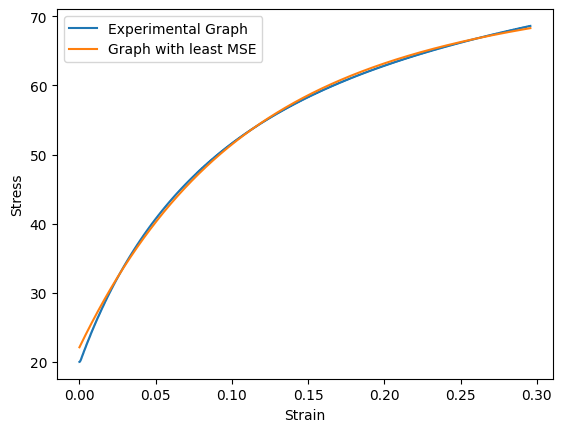

In [38]:
plt.plot(shear_strain,shear_stress,label='Experimental Graph')
plt.xlabel('Strain')
plt.ylabel('Stress')
c=y[2];d=y[3];a=y[0];b=y[1]
calc_stress=c+(d-c)*(1-np.exp(-1*a*shear_strain/d))+b*shear_strain
plt.plot(shear_strain,calc_stress,label='Graph with least MSE')
plt.legend()

In [39]:
df.shape

(2560000, 6)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df[['the0','theinf','tauco','taus']],df['MAE'],test_size=0.15,random_state=0)

In [41]:
train_df=pd.concat([X_train,Y_train],axis=1)
test_df=pd.concat([X_test,Y_test],axis=1)

In [42]:
train_df.shape,test_df.shape

((2176000, 5), (384000, 5))

In [43]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2176000, 4), (384000, 4), (2176000,), (384000,))

In [44]:
train_df.corr()['MAE'].sort_values()

theinf    0.186647
the0      0.341035
taus      0.354885
tauco     0.777041
MAE       1.000000
Name: MAE, dtype: float64

<AxesSubplot: xlabel='MAE', ylabel='Count'>

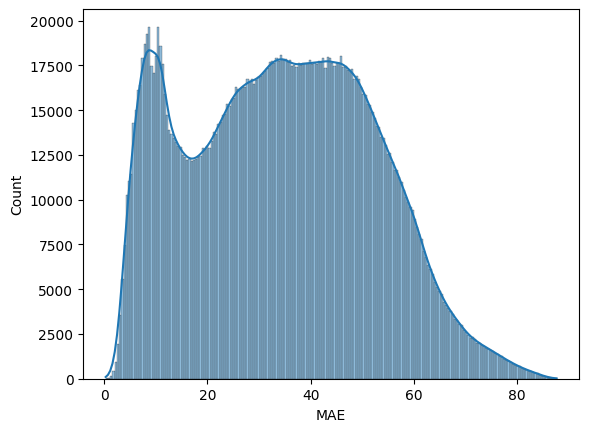

In [45]:
sns.histplot(train_df['MAE'],kde=True)

array([[<AxesSubplot: title={'center': 'the0'}>,
        <AxesSubplot: title={'center': 'theinf'}>],
       [<AxesSubplot: title={'center': 'tauco'}>,
        <AxesSubplot: title={'center': 'taus'}>],
       [<AxesSubplot: title={'center': 'MAE'}>, <AxesSubplot: >]],
      dtype=object)

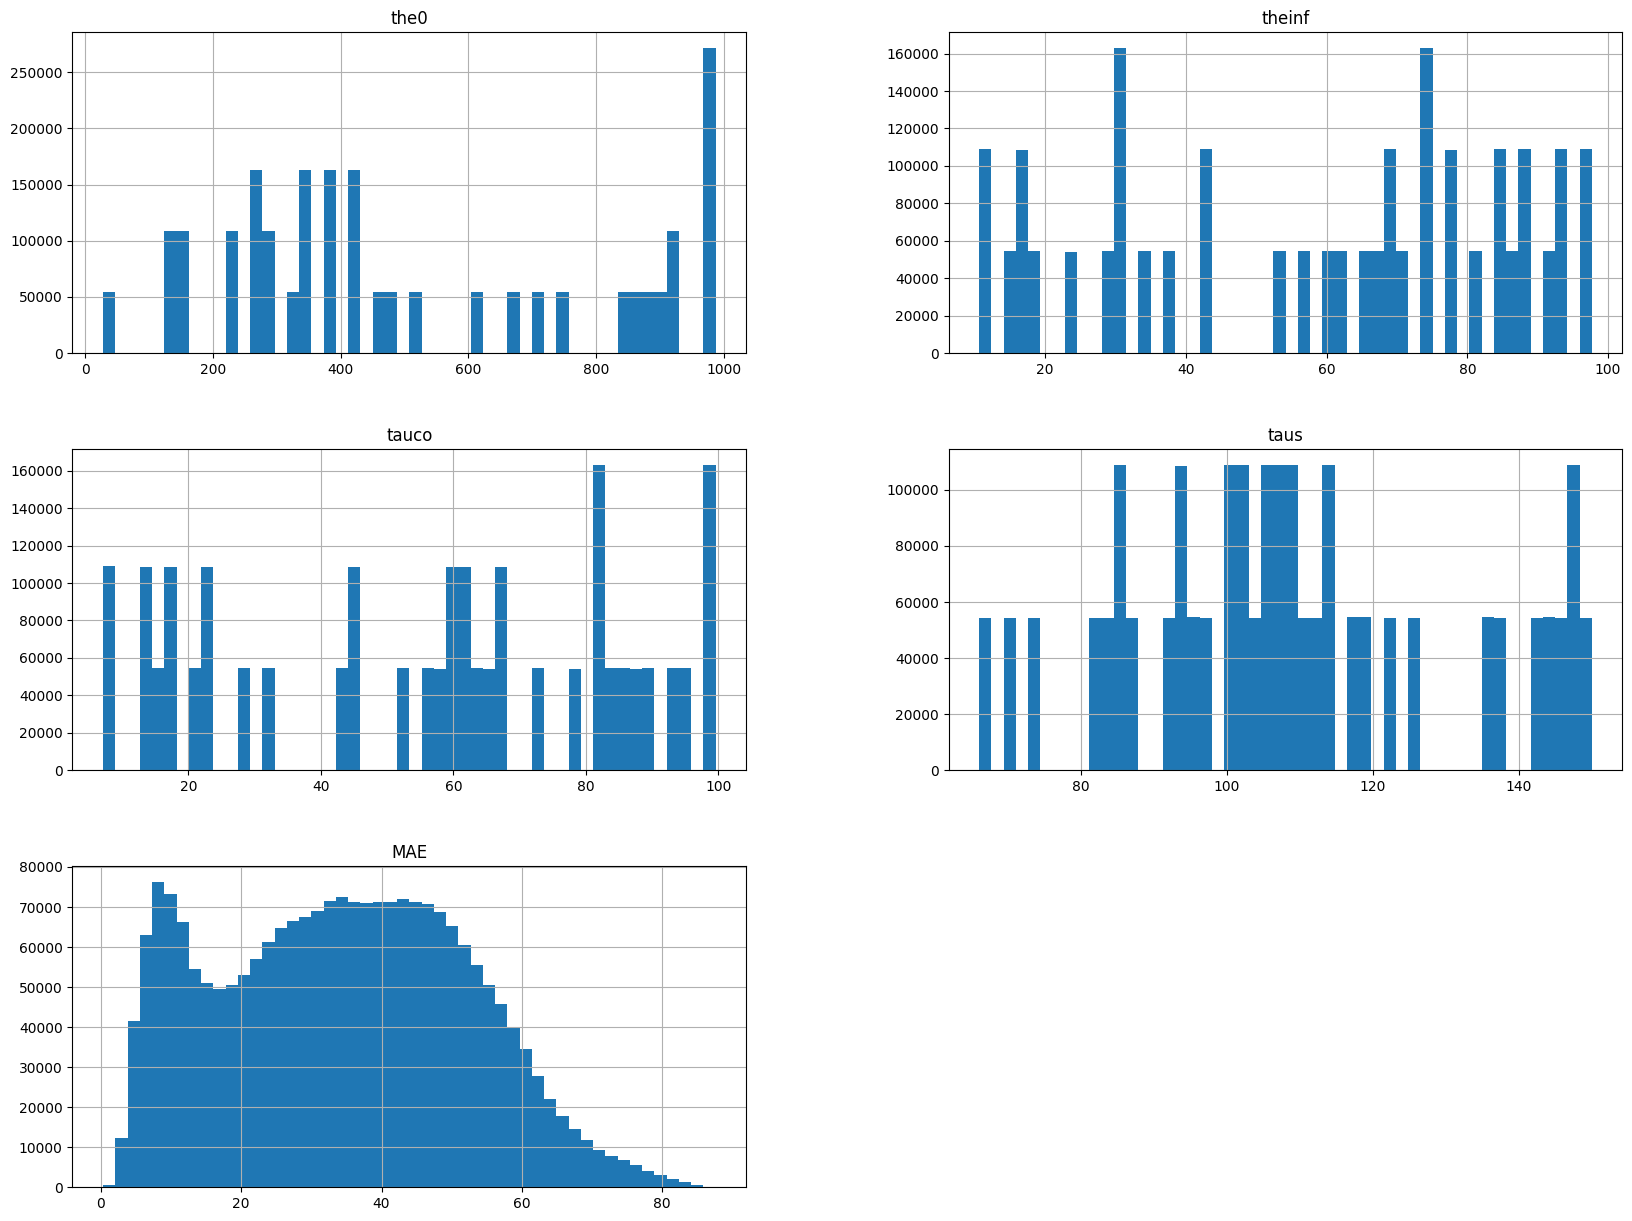

In [46]:
train_df.hist(bins=50,figsize=(20,15))

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

**Linear Regression**

In [71]:
lr_model=LinearRegression()
lr_model.fit(X_train_scaled, Y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  37.482442003716514
Mean absolute error from linear regression:  4.436266667266014


In [72]:
Y_test.shape

(384000,)

In [73]:
r2_lr = r2_score(Y_test, y_pred_lr)
print('r2 score for linear regression model is', r2_lr)

r2 score for linear regression model is 0.8808191194297564


Text(0.5, 1.0, 'One in 10 differences, Linear Regression')

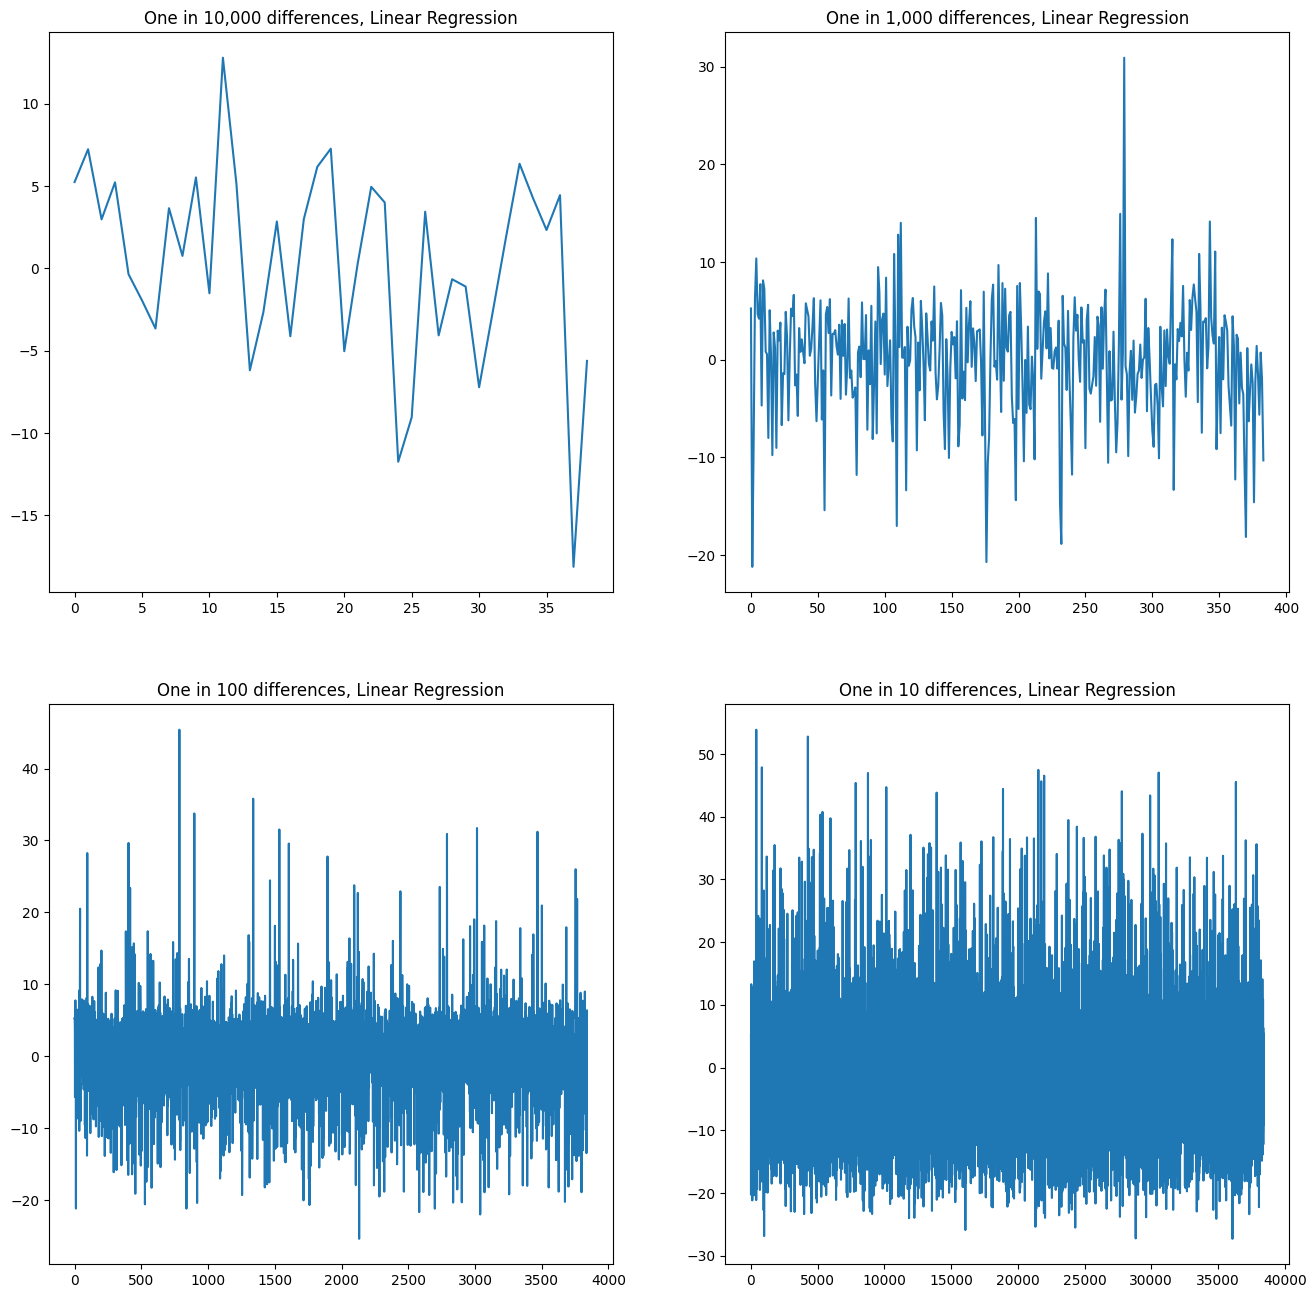

In [74]:
fig,ax=plt.subplots(2,2,figsize=(16,16))


diff_lr=np.array(Y_test - y_pred_lr)
ax[0,0].plot(diff_lr[::10000])
ax[0,0].set_title("One in 10,000 differences, Linear Regression")
ax[0,1].plot(diff_lr[::1000])
ax[0,1].set_title("One in 1,000 differences, Linear Regression")
ax[1,0].plot(diff_lr[::100])
ax[1,0].set_title("One in 100 differences, Linear Regression")
ax[1,1].plot(diff_lr[::10])
ax[1,1].set_title("One in 10 differences, Linear Regression")

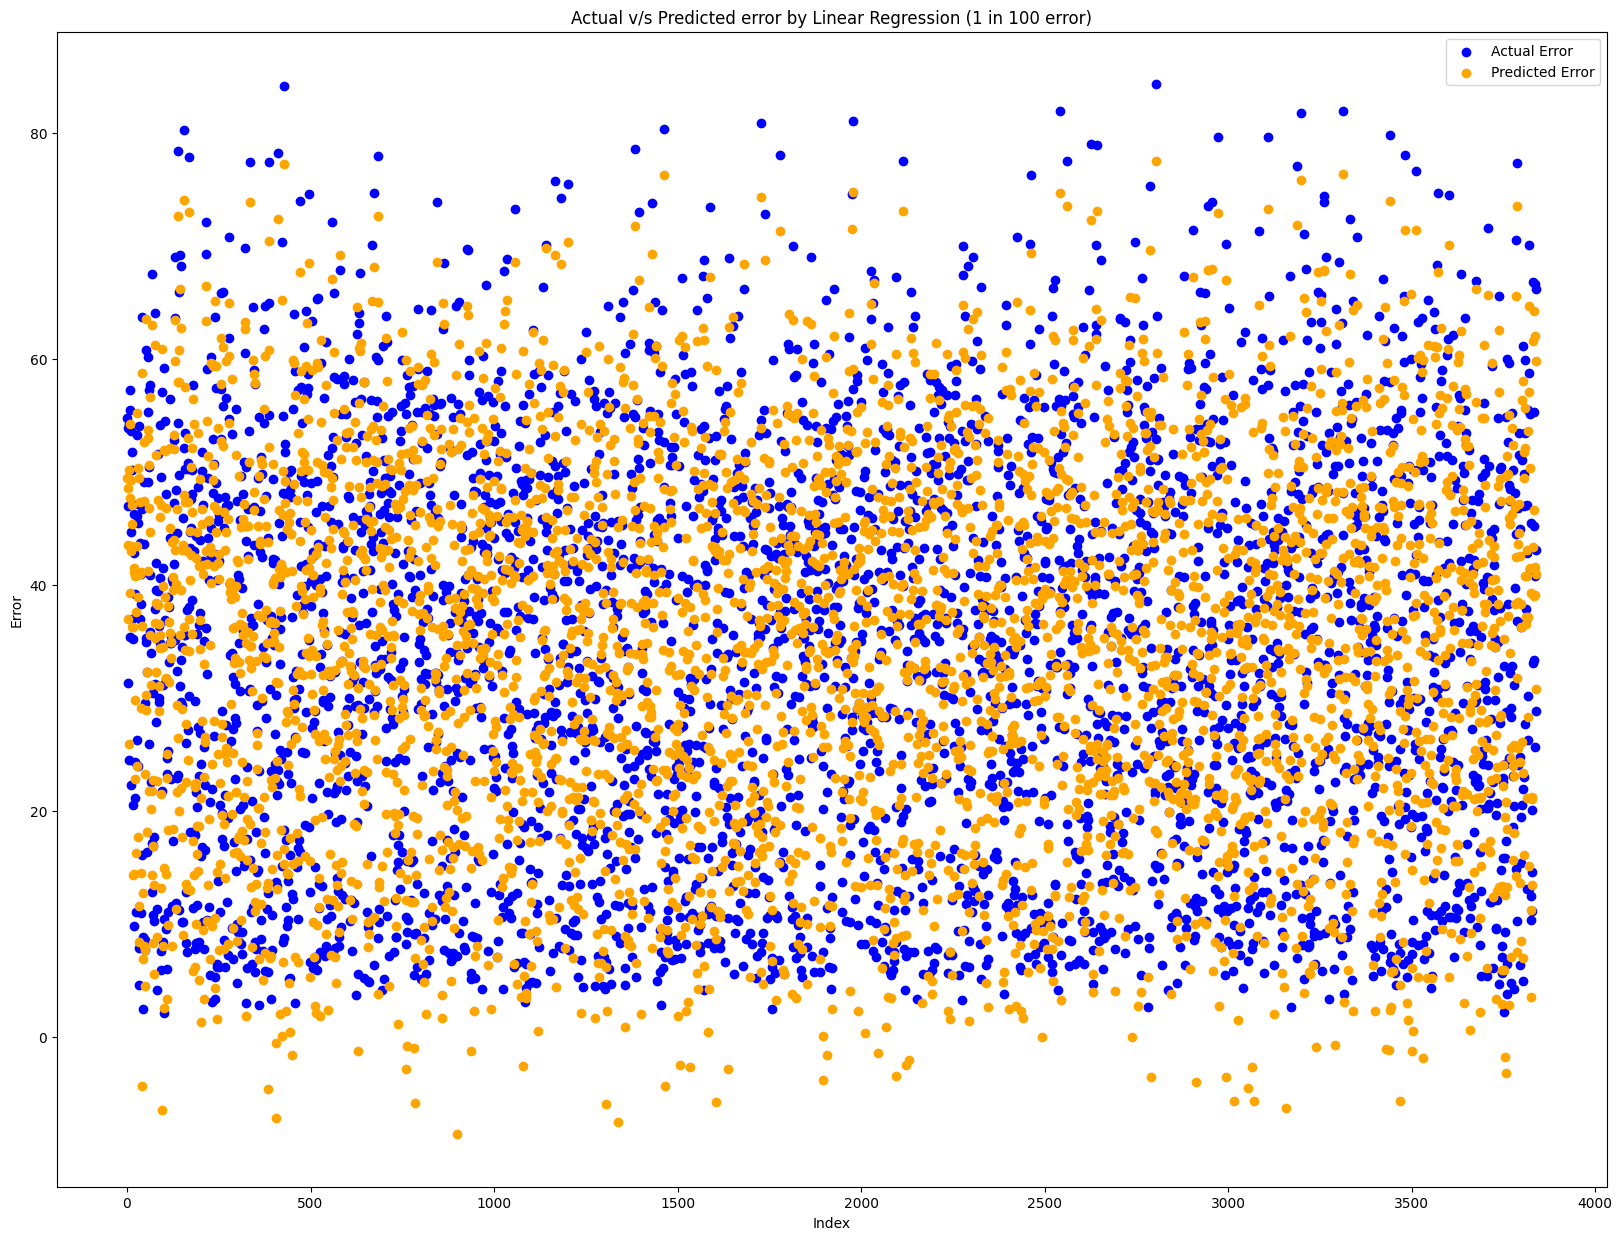

In [75]:
plt.figure(figsize=(20,15))
plt.scatter(np.arange(1,3841),Y_test[::100],label='Actual Error',color='blue')
plt.scatter(np.arange(1,3841),y_pred_lr[::100],label='Predicted Error',color='orange')
plt.ylabel('Error')
plt.xlabel('Index')
plt.title('Actual v/s Predicted error by Linear Regression (1 in 100 error)')
plt.legend()

<AxesSubplot: xlabel='MAE', ylabel='Count'>

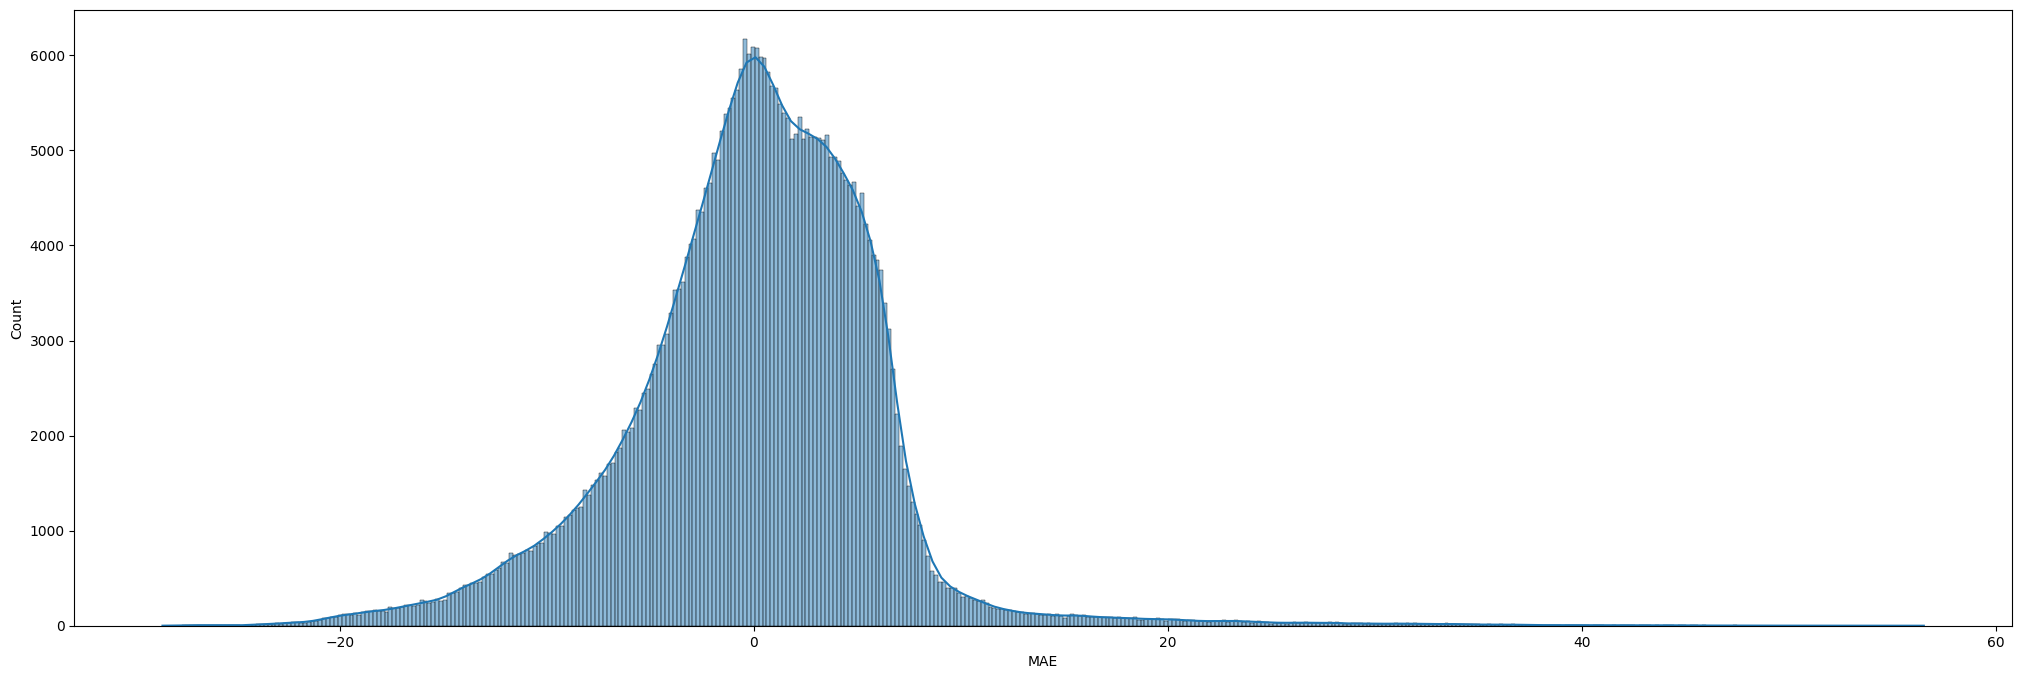

In [76]:
plt.figure(figsize=(25,8))
sns.histplot(Y_test - y_pred_lr,kde=True)

In [77]:
np.array(Y_test[:10]).reshape(10,1)

array([[54.75688803],
       [56.23962953],
       [73.38450393],
       [54.73771834],
       [18.18889635],
       [10.93308352],
       [15.87409453],
       [20.22332137],
       [14.46223281],
       [ 6.07103581]])

In [78]:
y_pred_lr[:10].reshape(10,1)

array([[49.51224197],
       [48.04040329],
       [66.93994224],
       [48.78988039],
       [19.97661404],
       [ 9.93238906],
       [19.08824965],
       [17.94683846],
       [21.94761491],
       [13.84473195]])

**Decision Tree**

In [79]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, Y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(Y_test, y_pred_tree)
mae_dt = mean_absolute_error(Y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  0.013927432190798752
Mean absolute error using decision tree:  0.07472040058658373


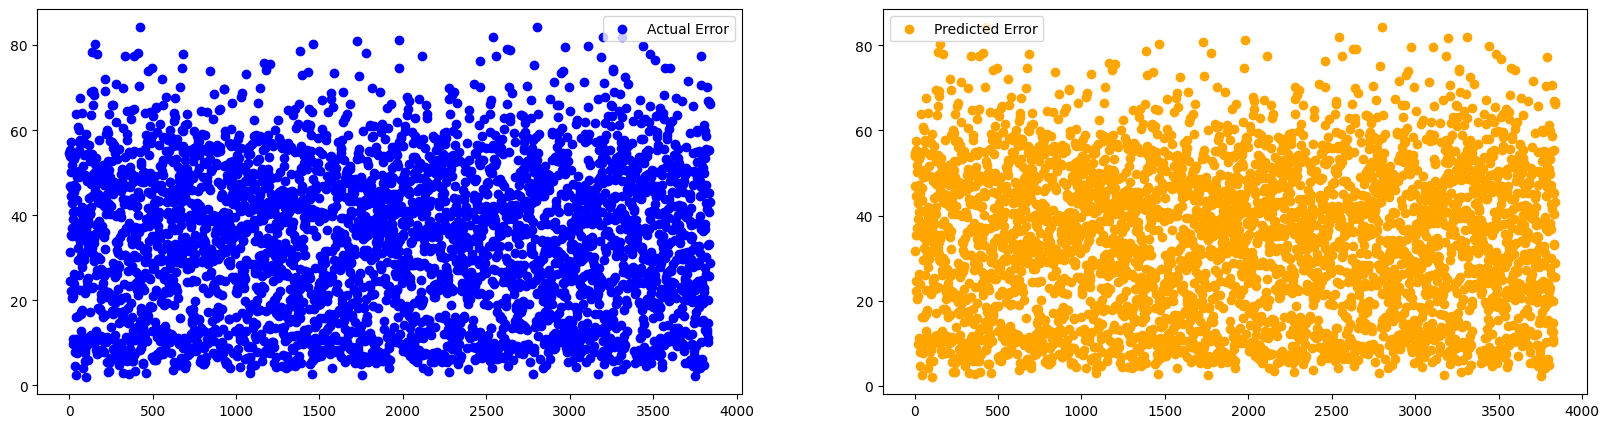

In [80]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,3841),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,3841),y_pred_tree[::100],label='Predicted Error',color='orange')
ax2.legend()

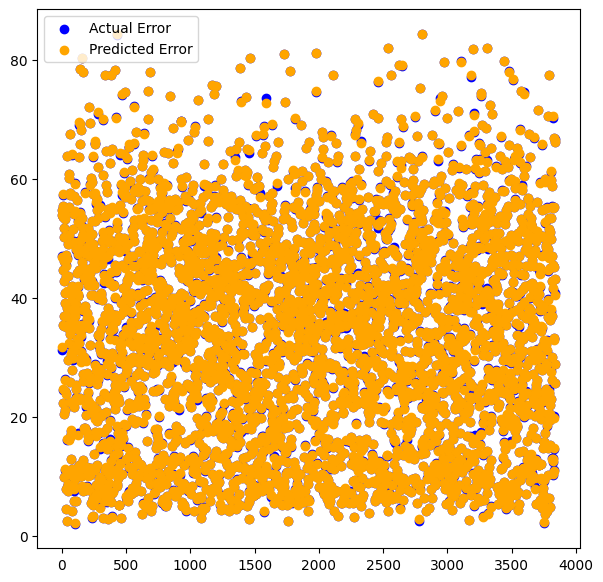

In [81]:
plt.figure(figsize=(7,7))
plt.scatter(np.arange(1,3841),Y_test[::100],label='Actual Error',color='blue')
plt.scatter(np.arange(1,3841),y_pred_tree[::100],label='Predicted Error',color='orange')
plt.legend()

In [82]:
diff_tree= (np.array(Y_test - y_pred_tree))

Text(0.5, 1.0, 'One in 10 differences, Decision Trees')

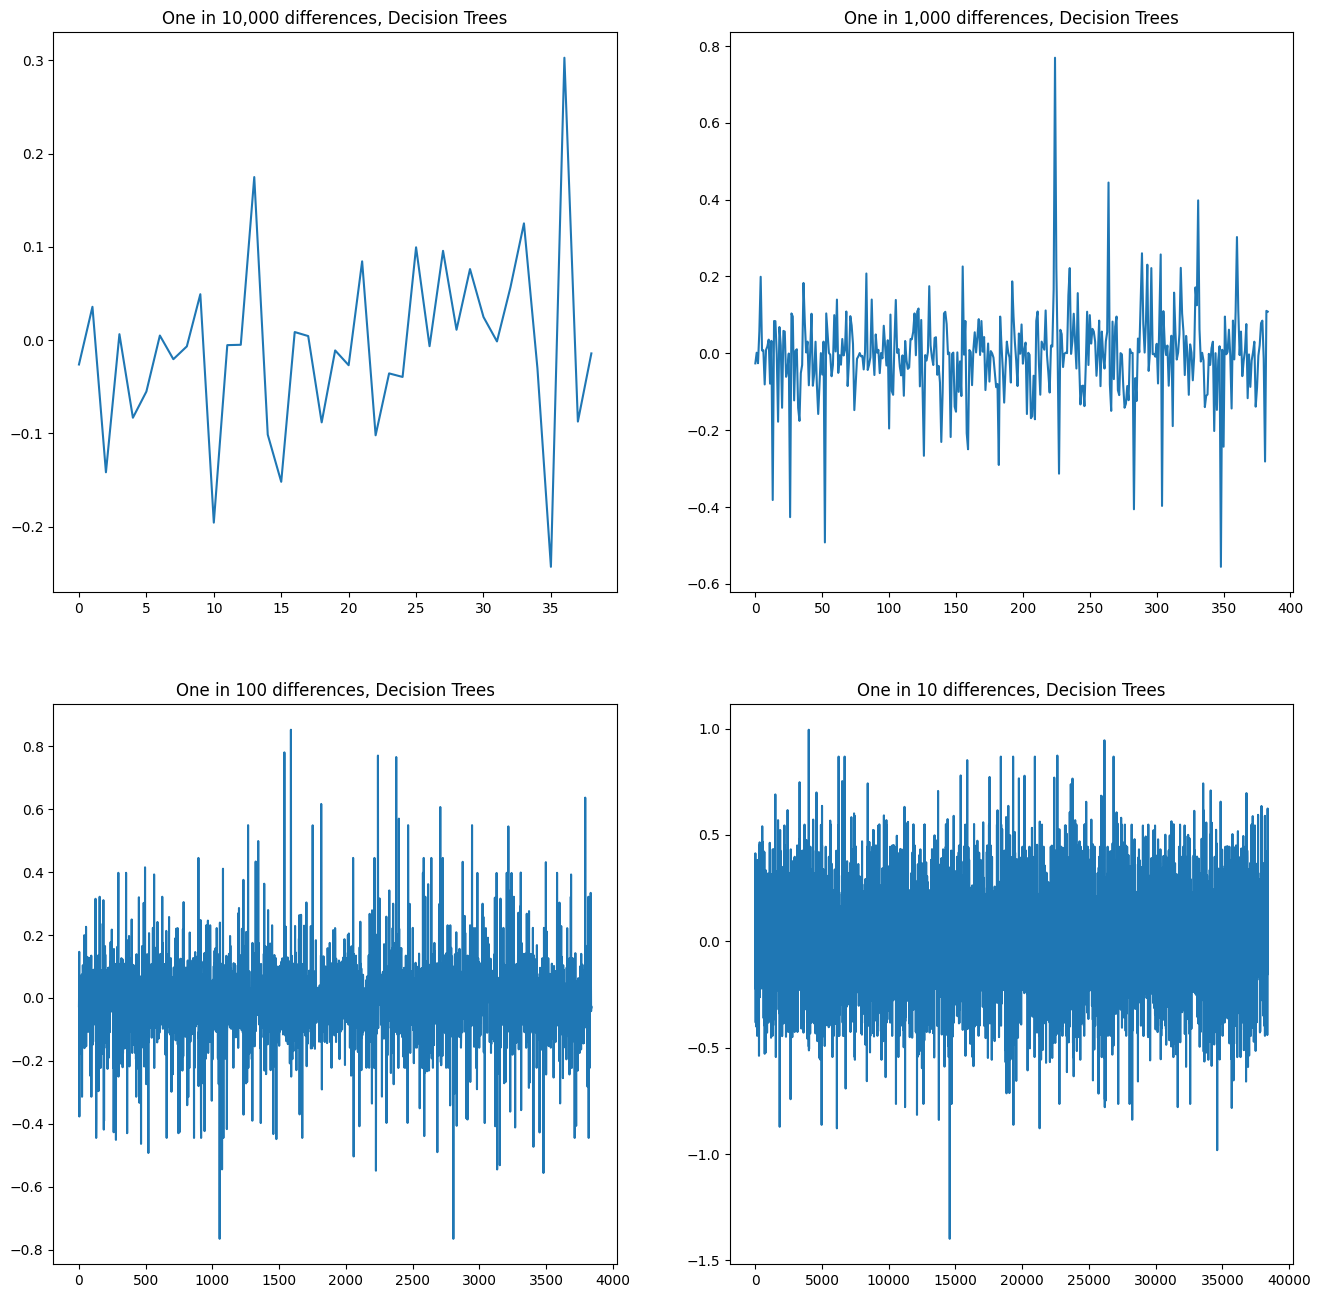

In [83]:
fig,ax=plt.subplots(2,2,figsize=(16,16))

ax[0,0].plot(diff_tree[::10000])
ax[0,0].set_title("One in 10,000 differences, Decision Trees")
ax[0,1].plot(diff_tree[::1000])
ax[0,1].set_title("One in 1,000 differences, Decision Trees")
ax[1,0].plot(diff_tree[::100])
ax[1,0].set_title("One in 100 differences, Decision Trees")
ax[1,1].plot(diff_tree[::10])
ax[1,1].set_title("One in 10 differences, Decision Trees")

<AxesSubplot: ylabel='Count'>

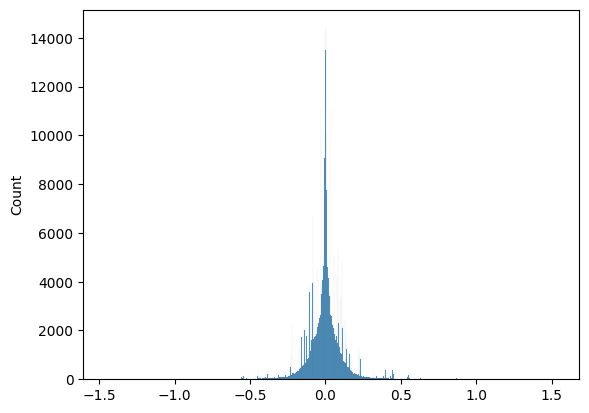

In [84]:
sns.histplot(np.array(Y_test - y_pred_tree))

In [85]:
r2_dt = r2_score(Y_test, y_pred_tree)
print('r2 score for decision tree model is', r2_dt)

r2 score for decision tree model is 0.9999557157019701


In [86]:
np.array(Y_test[:10]).reshape(10,1)

array([[54.75688803],
       [56.23962953],
       [73.38450393],
       [54.73771834],
       [18.18889635],
       [10.93308352],
       [15.87409453],
       [20.22332137],
       [14.46223281],
       [ 6.07103581]])

In [87]:
y_pred_tree[:10].reshape(10,1)

array([[54.78308467],
       [56.21996429],
       [73.39892773],
       [54.82181257],
       [18.01412382],
       [10.92702497],
       [16.31868893],
       [20.48762196],
       [14.61260847],
       [ 6.07233043]])

**Random Forest**

In [67]:
"""
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
model_RF.fit(X_train_scaled, Y_train)

y_pred_RF = model_RF.predict(X_test_scaled)

mse_RF = mean_squared_error(Y_test, y_pred_RF)
mae_RF = mean_absolute_error(Y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)
"""



#Ram crashed while running the cell so cant execute random forest model

"\nfrom sklearn.ensemble import RandomForestRegressor\nmodel_RF = RandomForestRegressor()\nmodel_RF.fit(X_train_scaled, Y_train)\n\ny_pred_RF = model_RF.predict(X_test_scaled)\n\nmse_RF = mean_squared_error(Y_test, y_pred_RF)\nmae_RF = mean_absolute_error(Y_test, y_pred_RF)\nprint('Mean squared error using Random Forest: ', mse_RF)\nprint('Mean absolute error Using Random Forest: ', mae_RF)\n"

**K Nearest Neighbour**

In [88]:
knn=KNeighborsRegressor()
knn.fit(X_train_scaled, Y_train)
y_pred_knn = knn.predict(X_test_scaled)
mse_knn = mean_squared_error(Y_test, y_pred_knn)
mae_knn = mean_absolute_error(Y_test, y_pred_knn)
print('Mean squared error using K nearest neighbours: ', mse_knn)
print('Mean absolute error using K nearest neighbours: ', mae_knn)

Mean squared error using K nearest neighbours:  0.050521757453128334
Mean absolute error using K nearest neighbours:  0.15127631665930227


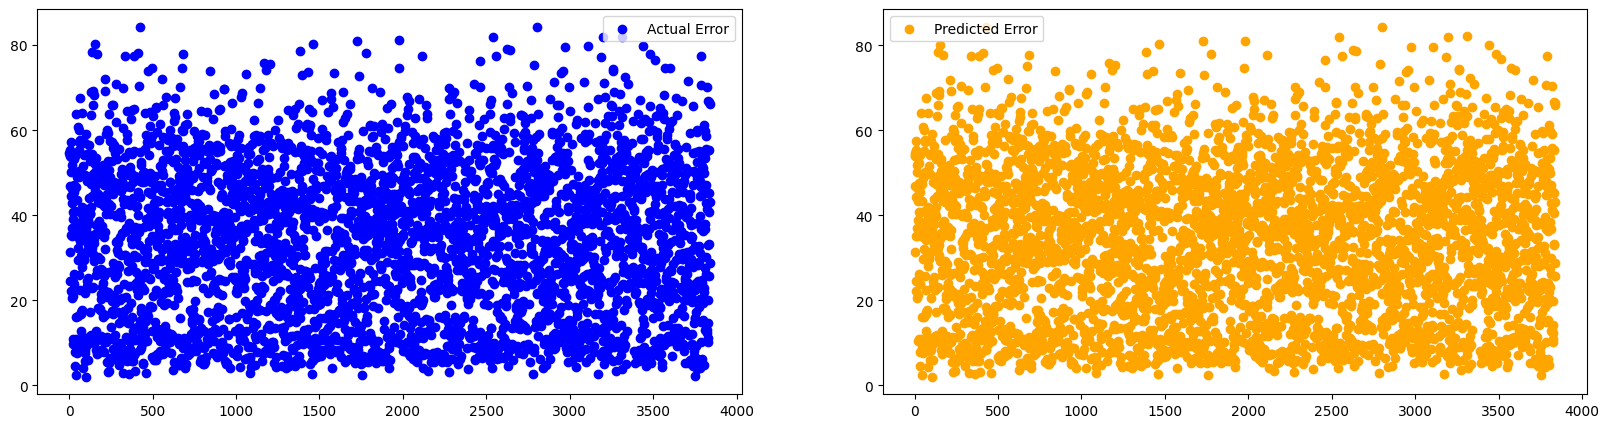

In [89]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,3841),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,3841),y_pred_knn[::100],label='Predicted Error',color='orange')
ax2.legend()

Text(0.5, 1.0, 'One in 10 differences, K-Nearest Neighbour')

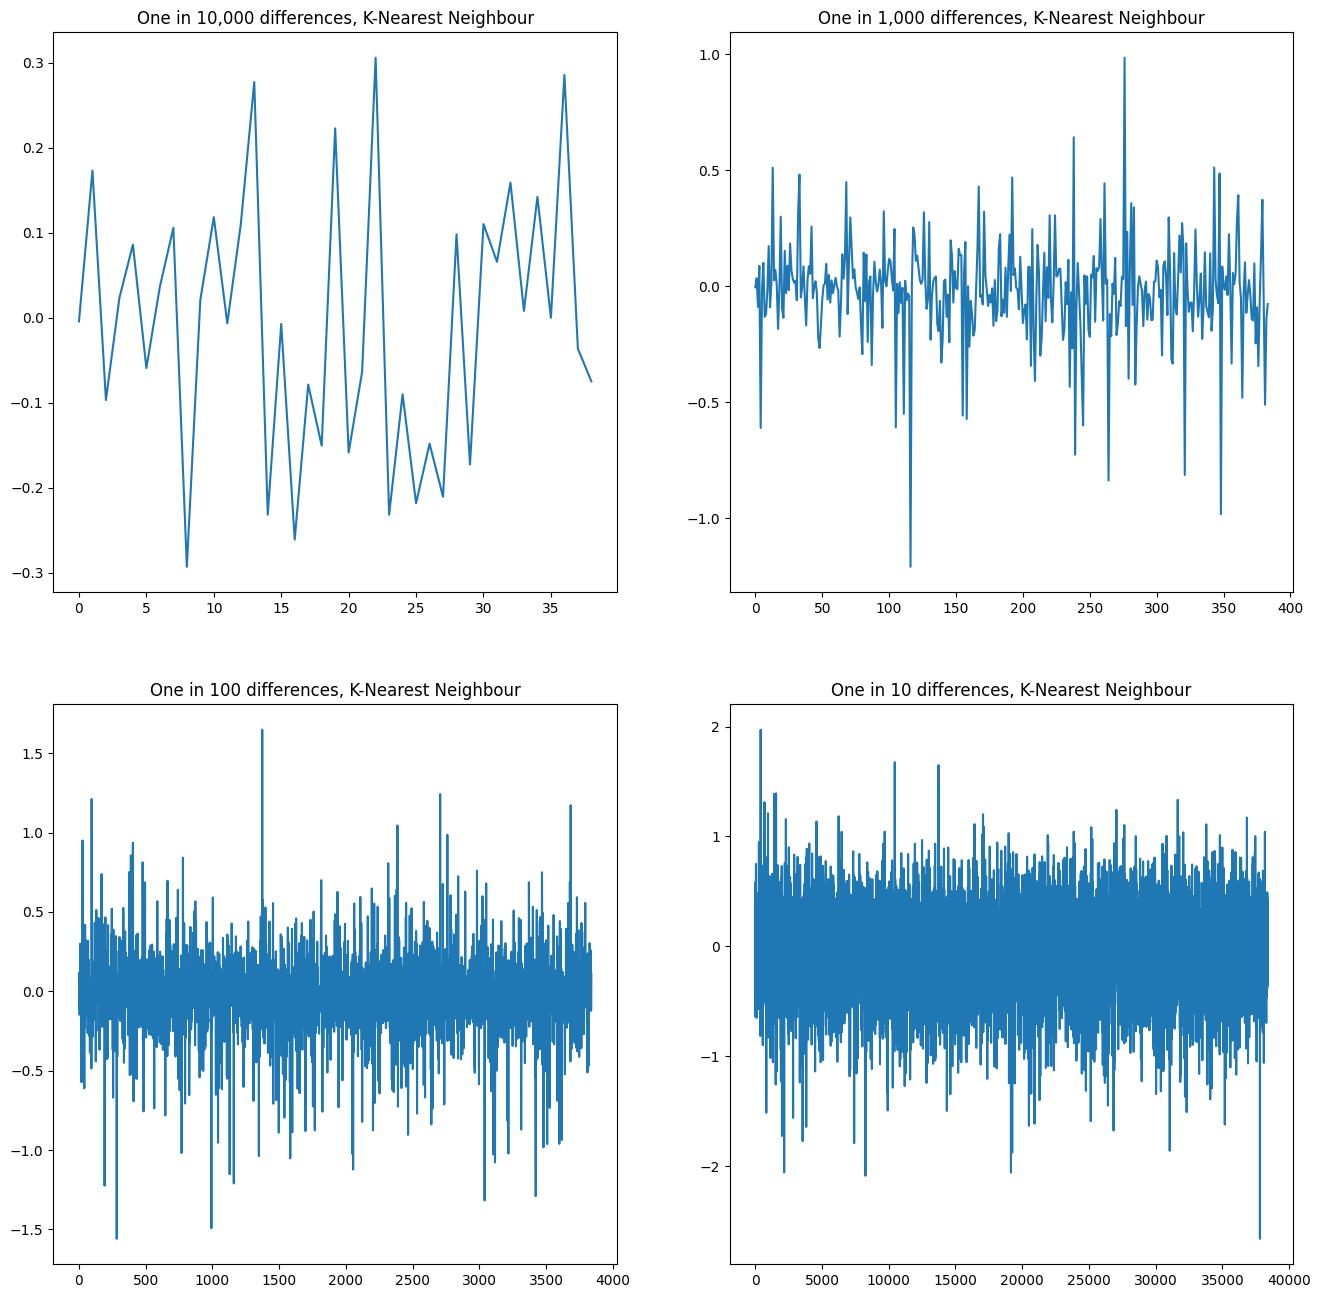

In [90]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
diff_knn= (np.array(Y_test - y_pred_knn))

ax[0,0].plot(diff_knn[::10000])
ax[0,0].set_title("One in 10,000 differences, K-Nearest Neighbour")
ax[0,1].plot(diff_knn[::1000])
ax[0,1].set_title("One in 1,000 differences, K-Nearest Neighbour")
ax[1,0].plot(diff_knn[::100])
ax[1,0].set_title("One in 100 differences, K-Nearest Neighbour")
ax[1,1].plot(diff_knn[::10])
ax[1,1].set_title("One in 10 differences, K-Nearest Neighbour")

In [91]:
r2_knn = r2_score(Y_test, y_pred_knn)
print('r2 score for K nearest neighbours is', r2_knn)

r2 score for K nearest neighbours is 0.9998393587178599


In [92]:
np.array(Y_test[:10]).reshape(10,1)

array([[54.75688803],
       [56.23962953],
       [73.38450393],
       [54.73771834],
       [18.18889635],
       [10.93308352],
       [15.87409453],
       [20.22332137],
       [14.46223281],
       [ 6.07103581]])

In [93]:
y_pred_knn[:10].reshape(10,1)

array([[54.76115692],
       [56.3321808 ],
       [73.40255289],
       [54.5772166 ],
       [18.05298735],
       [11.01561489],
       [16.39162923],
       [19.91750812],
       [14.5823044 ],
       [ 6.07323365]])

**Ridge Regression**

In [74]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(X_train_scaled, Y_train)
y_pred_rid = ridge.predict(X_test_scaled)
mse_rid = mean_squared_error(Y_test, y_pred_rid)
mae_rid = mean_absolute_error(Y_test, y_pred_rid)
print('Mean squared error using Ridge Regression: ', mse_rid)
print('Mean absolute error using Ridge Regression: ', mae_rid)

Mean squared error using Ridge Regression:  37.48244196143444
Mean absolute error using Ridge Regression:  4.436267876015217


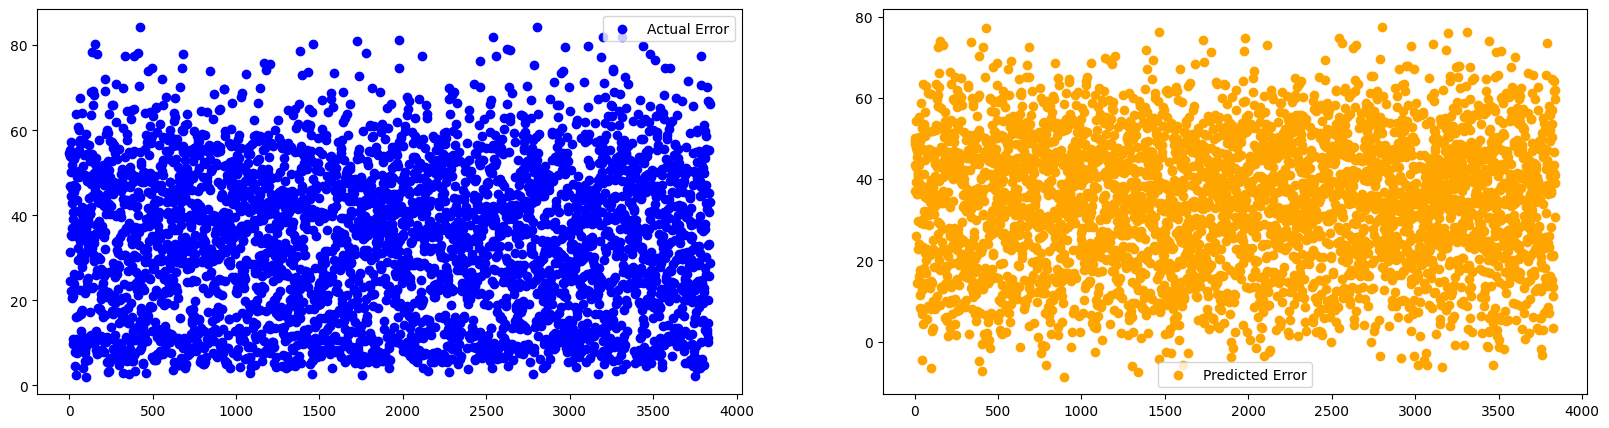

In [76]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,3841),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,3841),y_pred_rid[::100],label='Predicted Error',color='orange')
ax2.legend()

Text(0.5, 1.0, 'One in 10 differences, Ridge Regression')

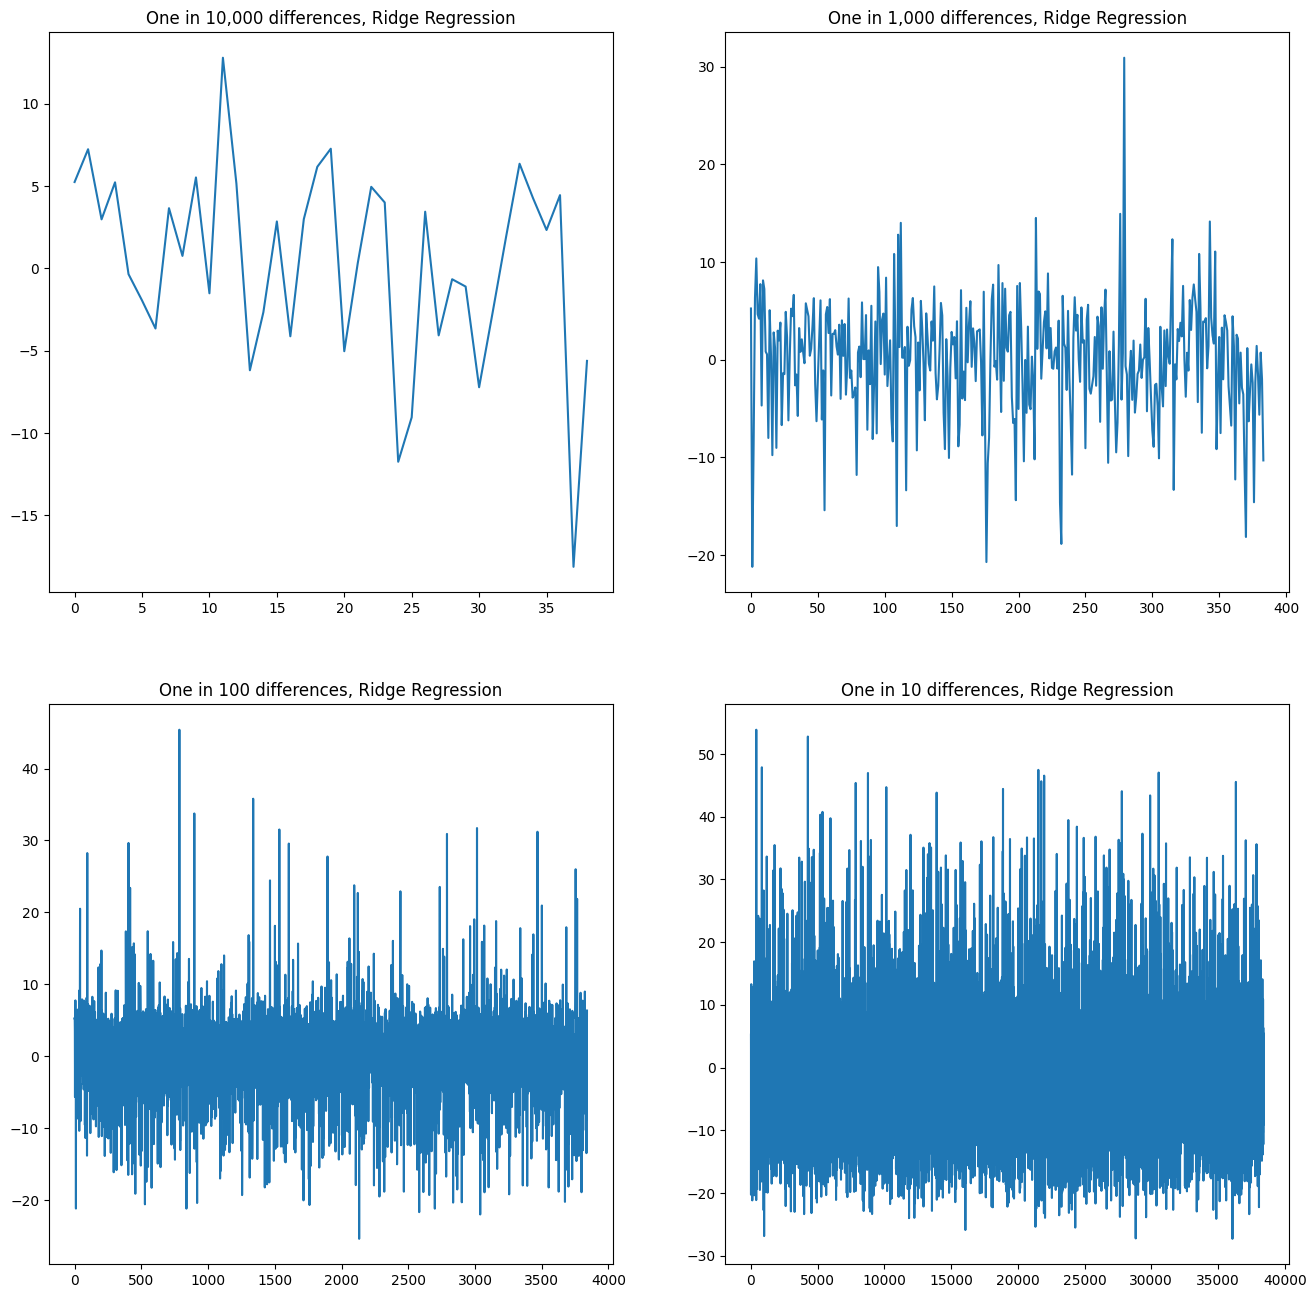

In [77]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
diff_rid= (np.array(Y_test - y_pred_rid))

ax[0,0].plot(diff_rid[::10000])
ax[0,0].set_title("One in 10,000 differences, Ridge Regression")
ax[0,1].plot(diff_rid[::1000])
ax[0,1].set_title("One in 1,000 differences, Ridge Regression")
ax[1,0].plot(diff_rid[::100])
ax[1,0].set_title("One in 100 differences, Ridge Regression")
ax[1,1].plot(diff_rid[::10])
ax[1,1].set_title("One in 10 differences, Ridge Regression")

<AxesSubplot: xlabel='MAE', ylabel='Count'>

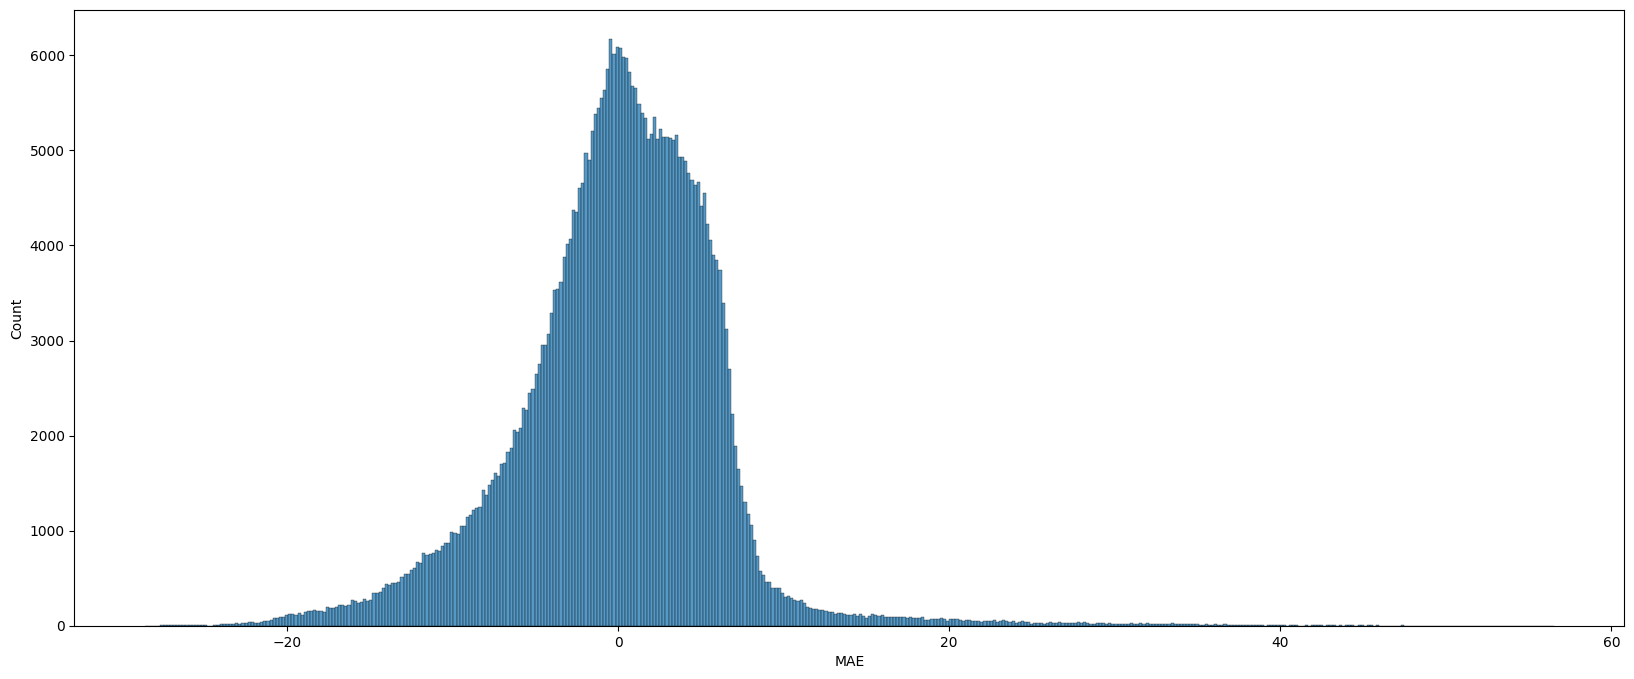

In [78]:
plt.figure(figsize=(20,8))
sns.histplot(Y_test - y_pred_rid)

In [79]:
r2_rid = r2_score(Y_test, y_pred_rid)
print('r2 score for Ridge Regression is', r2_rid)

r2 score for Ridge Regression is 0.8808191195641984


**Lasso Regression**

In [80]:
lasso= Lasso()
lasso.fit(X_train_scaled, Y_train)
y_pred_las = lasso.predict(X_test_scaled)
mse_las = mean_squared_error(Y_test, y_pred_las)
mae_las = mean_absolute_error(Y_test, y_pred_las)
print('Mean squared error using Lasso Regression: ', mse_las)
print('Mean absolute error using Lasso Regression: ', mae_las)

Mean squared error using Lasso Regression:  41.48988833595265
Mean absolute error using Lasso Regression:  4.985406951544222


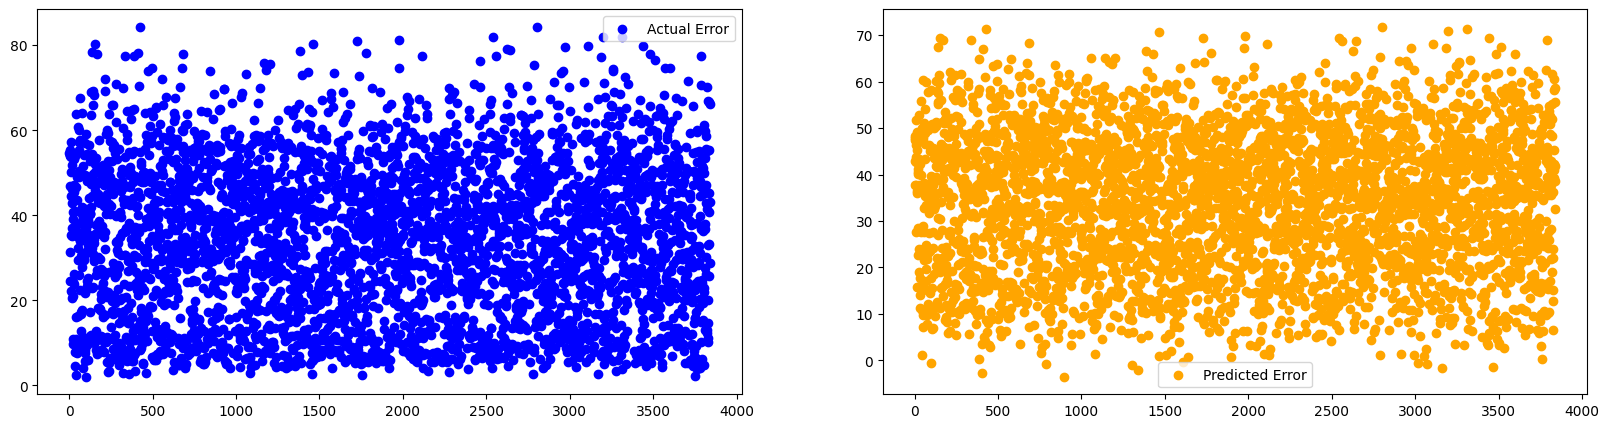

In [82]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,3841),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,3841),y_pred_las[::100],label='Predicted Error',color='orange')
ax2.legend()

Text(0.5, 1.0, 'One in 10 differences, Lasso Regression')

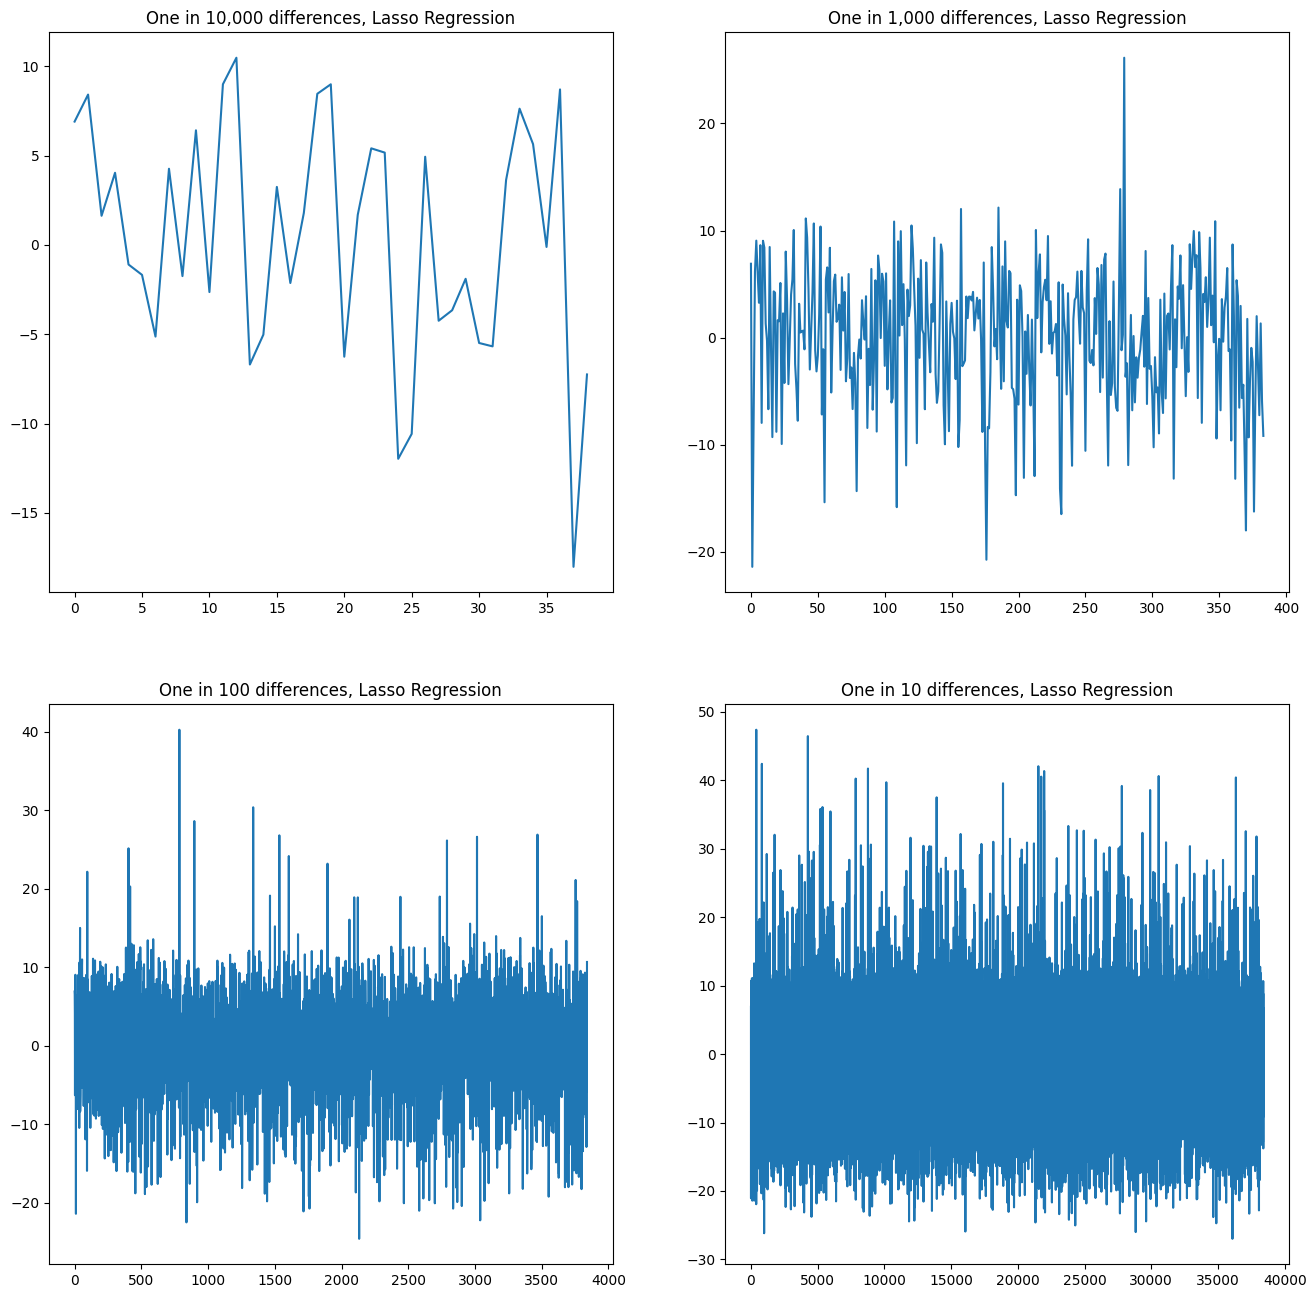

In [83]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
diff_las= (np.array(Y_test - y_pred_las))

ax[0,0].plot(diff_las[::10000])
ax[0,0].set_title("One in 10,000 differences, Lasso Regression")
ax[0,1].plot(diff_las[::1000])
ax[0,1].set_title("One in 1,000 differences, Lasso Regression")
ax[1,0].plot(diff_las[::100])
ax[1,0].set_title("One in 100 differences, Lasso Regression")
ax[1,1].plot(diff_las[::10])
ax[1,1].set_title("One in 10 differences, Lasso Regression")

In [84]:
r2_las = r2_score(Y_test, y_pred_las)
print('r2 score for Lasso Regression is', r2_las)

r2 score for Lasso Regression is 0.8680768604631037


<AxesSubplot: xlabel='MAE', ylabel='Count'>

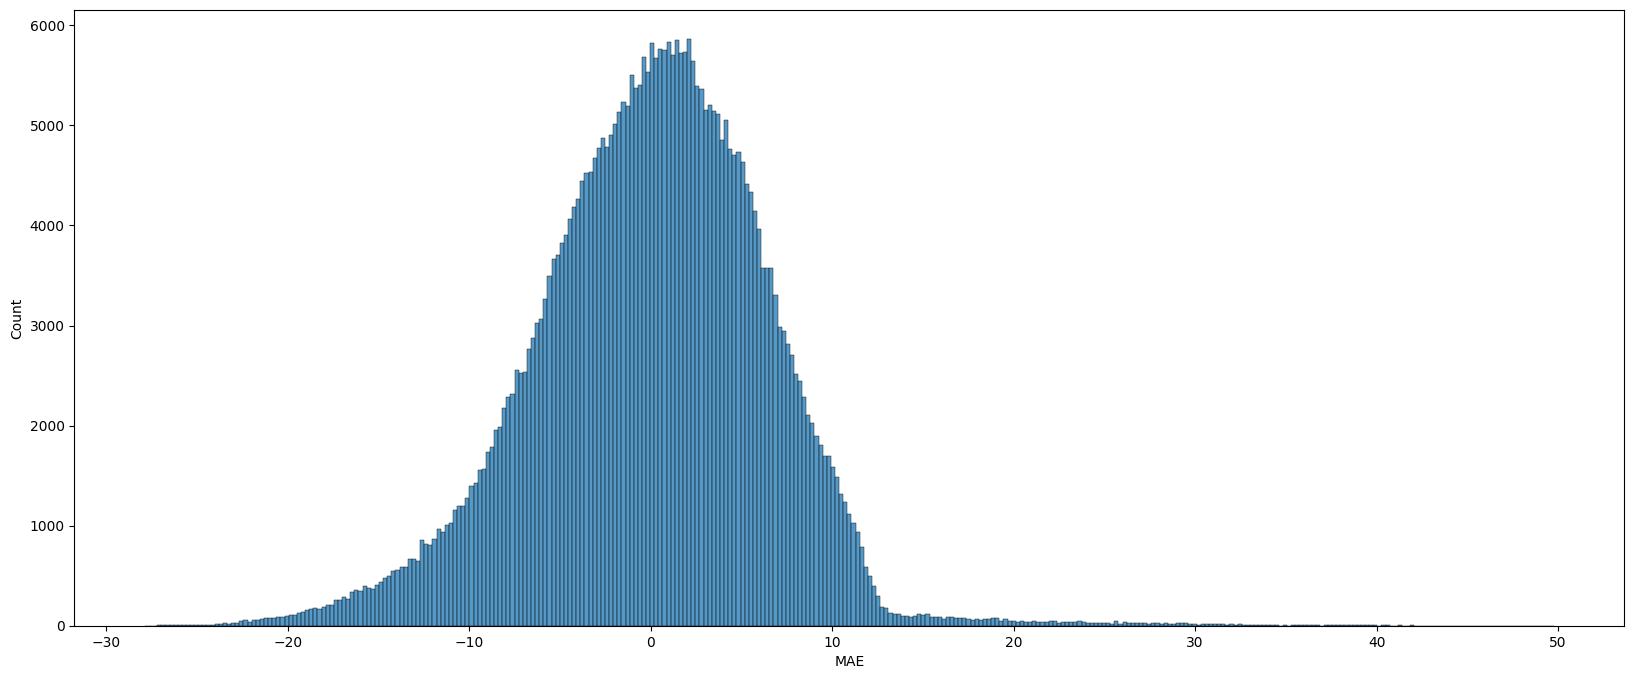

In [85]:
plt.figure(figsize=(20,8))
sns.histplot(Y_test - y_pred_las)

**Ridge Regression long with Polynomial Regression**

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(df[['the0','theinf','tauco','taus']])
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_F1_poly,df['MAE'],
                                                   random_state = 0)
linreg = Ridge().fit(X_train_poly, y_train_poly)
y_pred_poly= linreg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
print('Mean squared error using Ridge with polynomial regression: ', mse_poly)
print('Mean absolute error using Ridge with polynomial regression: ', mae_poly)

Mean squared error using Ridge with polynomial regression:  14.295746442832806
Mean absolute error using Ridge with polynomial regression:  2.440444976514224


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.74778e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [88]:
r2_poly = r2_score(y_test_poly,y_pred_poly)
print('r2 score for Polynomial Regression is', r2_poly)

r2 score for Polynomial Regression is 0.9545713776597974


In [89]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(X_train_scaled, Y_train)
# y_pred_rbf = regressor.predict(X_test_scaled)
# mse_rbf = mean_squared_error(Y_test, y_pred_rbf)
# mae_rbf = mean_absolute_error(Y_test, y_pred_rbf)
# print('Mean squared error using Support Vector regressor (rbf krenel) : ', mse_rbf)
# print('Mean absolute error using Support Vector regressor (rbf krenel) : ', mae_rbf)

### Took huge amount of time still didnt got execute.

**Artificial Neural Network**

In [50]:
import tensorflow as tf 
from tensorflow import keras

In [51]:
model=keras.Sequential()
model.add(keras.layers.Dense(500,input_dim=4,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(300,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(150,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(70,activation='relu'))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(10,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(5,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               2500      
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dense_3 (Dense)             (None, 70)                10570     
                                                                 
 dense_4 (Dense)             (None, 50)                3550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
 dense_6 (Dense)             (None, 5)                 5

In [52]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('stress_strain_shear_weights.h5', verbose=1, save_best_only=True)
model.fit(X_train_scaled,Y_train,
         epochs = 20,
         validation_split=0.2,
         callbacks = checkpointer
         )

Epoch 1/20
54389/54400 [============================>.] - ETA: 0s - loss: 1.2768 - mae: 0.2767
Epoch 1: val_loss improved from inf to 0.73334, saving model to stress_strain_shear_weights.h5
54400/54400 [==============================] - 249s 4ms/step - loss: 1.2766 - mae: 0.2768 - val_loss: 0.7333 - val_mae: 0.7509
Epoch 2/20
54393/54400 [============================>.] - ETA: 0s - loss: 0.0342 - mae: 0.1152
Epoch 2: val_loss improved from 0.73334 to 0.00492, saving model to stress_strain_shear_weights.h5
54400/54400 [==============================] - 241s 4ms/step - loss: 0.0342 - mae: 0.1152 - val_loss: 0.0049 - val_mae: 0.0461
Epoch 3/20
54399/54400 [============================>.] - ETA: 0s - loss: 0.0213 - mae: 0.0912
Epoch 3: val_loss improved from 0.00492 to 0.00267, saving model to stress_strain_shear_weights.h5
54400/54400 [==============================] - 242s 4ms/step - loss: 0.0213 - mae: 0.0912 - val_loss: 0.0027 - val_mae: 0.0442
Epoch 4/20
54400/54400 [=================

In [53]:
from keras.models import Sequential, load_model

In [54]:
model = load_model('/kaggle/working/stress_strain_shear_weights.h5')
y_pred_ann = model.predict(X_test_scaled)
mse_ann = mean_squared_error(Y_test, y_pred_ann)
mae_ann = mean_absolute_error(Y_test, y_pred_ann)
print('Mean squared error using Artificial Neural Network: ', mse_ann)
print('Mean absolute error using Artificial Neural Network: ', mae_ann)

12000/12000 [==============================] - 21s 2ms/step
Mean squared error using Artificial Neural Network:  0.0005500258678930491
Mean absolute error using Artificial Neural Network:  0.01725825653635755


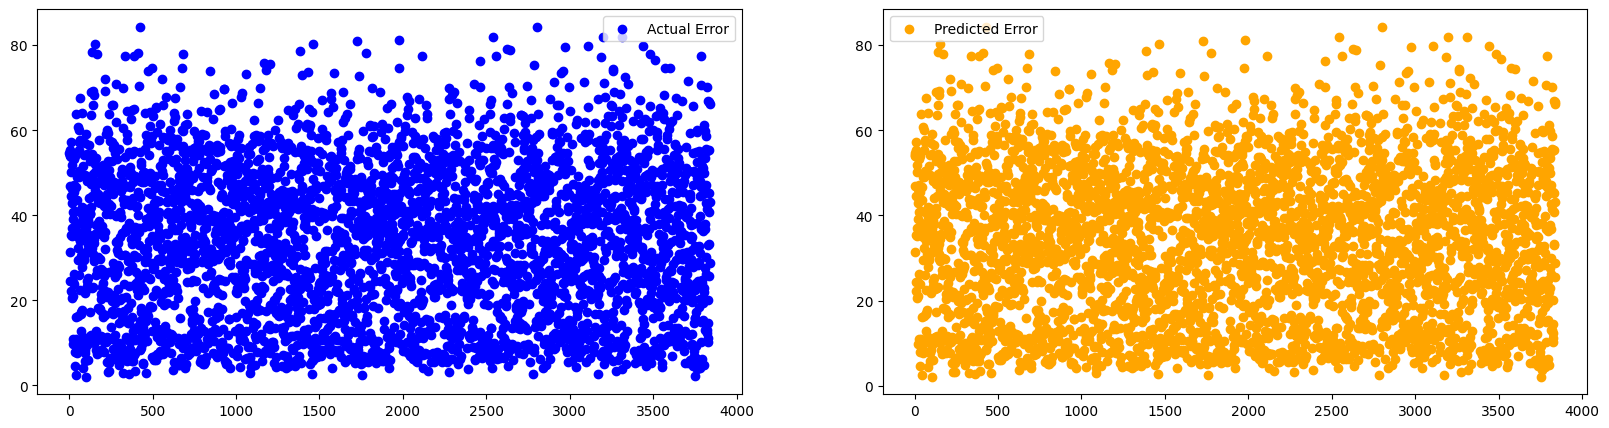

In [55]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,3841),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,3841),y_pred_ann[::100],label='Predicted Error',color='orange')
ax2.legend()

In [56]:
r2_ann = r2_score(Y_test, y_pred_ann)
print('r2 score for ANN is', r2_ann)

r2 score for ANN is 0.9999982511126873


In [57]:
np.array(Y_test[:10]).reshape(10,1)

array([[54.75688803],
       [56.23962953],
       [73.38450393],
       [54.73771834],
       [18.18889635],
       [10.93308352],
       [15.87409453],
       [20.22332137],
       [14.46223281],
       [ 6.07103581]])

In [58]:
y_pred_ann[:10].reshape(10,1)

array([[54.73244  ],
       [56.250645 ],
       [73.37509  ],
       [54.714233 ],
       [18.222584 ],
       [10.943695 ],
       [15.8877   ],
       [20.220045 ],
       [14.477197 ],
       [ 6.0799894]], dtype=float32)

In [59]:
model.save("shear_ANN_Model.h5")
print("Saved model to disk")

Saved model to disk


In [60]:
"""
After applying several models, their results are as following:

Linear Regression: 
Mean squared error from linear regression:  37.482442003716514
Mean absolute error from linear regression:  4.436266667266014
r2 score for linear regression model is 0.8808191194297564

Decision Tree:
Mean squared error using decision tree:  0.013916945661842092
Mean absolute error using decision tree:  0.07470296920441791
r2 score for decision tree model is 0.9999557490454154

KNN:
Mean squared error using K nearest neighbours:  0.050521757453128334
Mean absolute error using K nearest neighbours:  0.15127631665930227
r2 score for K nearest neighbours is 0.9998393587178599

Ridge:
Mean squared error using Ridge Regression:  37.48244196143444
Mean absolute error using Ridge Regression:  4.436267876015217
r2 score for Ridge Regression is 0.8808191195641984

Lasso:
Mean squared error using Lasso Regression:  41.48988833595265
Mean absolute error using Lasso Regression:  4.985406951544222
r2 score for Lasso Regression is 0.8680768604631037

Polynomial (deg 2) with Ridge:
Mean squared error using Ridge with polynomial regression:  14.295746442832806
Mean absolute error using Ridge with polynomial regression:  2.440444976514224
r2 score for Polynomial Regression is 0.9545713776597974

ANN:
Mean squared error using Artificial Neural Network:  0.0005500258678930491
Mean absolute error using Artificial Neural Network:  0.01725825653635755
r2 score for ANN is 0.9999982511126873

"""

'\nAfter applying several models, their results are as following:\n\nLinear Regression: \nMean squared error from linear regression:  37.482442003716514\nMean absolute error from linear regression:  4.436266667266014\nr2 score for linear regression model is 0.8808191194297564\n\nDecision Tree:\nMean squared error using decision tree:  0.013916945661842092\nMean absolute error using decision tree:  0.07470296920441791\nr2 score for decision tree model is 0.9999557490454154\n\nKNN:\nMean squared error using K nearest neighbours:  0.050521757453128334\nMean absolute error using K nearest neighbours:  0.15127631665930227\nr2 score for K nearest neighbours is 0.9998393587178599\n\nRidge:\nMean squared error using Ridge Regression:  37.48244196143444\nMean absolute error using Ridge Regression:  4.436267876015217\nr2 score for Ridge Regression is 0.8808191195641984\n\nLasso:\nMean squared error using Lasso Regression:  41.48988833595265\nMean absolute error using Lasso Regression:  4.9854069

In [67]:
b=int(input("Enter the value of theta infinity (10-100)"))
a=int(input('Enter the value of theta0 (>thetinf & 10-1000)'))
c=float(input('Enter the value of tauc0 (0-100)'))
d=float(input('Enter the value of taus (50-150 & >tauc0)'))

Enter the value of theta infinity (10-100) 18
Enter the value of theta0 (>thetinf & 10-1000) 660
Enter the value of tauc0 (0-100) 20
Enter the value of taus (50-150 & >tauc0) 65


In [68]:
scaled_input=scaler.transform([[a,b,c,d]])
scaled_input

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.48753386, -1.4571045 , -1.25080852, -1.96967041]])

In [69]:
calc_stress=c+(d-c)*(1-np.exp(-1*a*shear_strain/d))+b*shear_strain

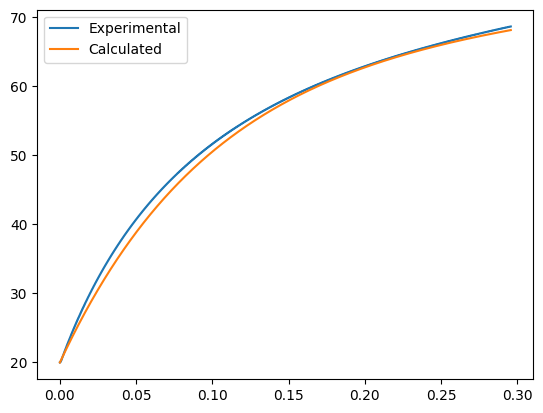

In [70]:
plt.plot(shear_strain,shear_stress,label='Experimental')
plt.plot(shear_strain,calc_stress,label='Calculated')
plt.legend()

In [95]:
print("Actual MAE : ",mae(shear_stress,calc_stress))
print("Predicted MAE by ANN: ",model.predict(scaled_input)[0][0])
print("Predicted MAE by Linear Regression: ",lr_model.predict(scaled_input)[0])
print("Predicted MAE by Decision Trees: ",tree.predict(scaled_input)[0])
print("Predicted MAE by KNN: ",knn.predict(scaled_input)[0])

Actual MAE :  0.7729565515718241
1/1 [==============================] - 0s 117ms/step
Predicted MAE by ANN:  0.6805955
Predicted MAE by Linear Regression:  2.7539832142037497
Predicted MAE by Decision Trees:  0.584223003613915
Predicted MAE by KNN:  0.8165328175934107


In [96]:
import pickle
pickle.dump(model, open('ANN_explo_shear_model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........activation
............vars
.........vars
............0
............1
......dense_1
.........activation
............vars
.........vars
............0
............1
......dense_2
.........activation
............vars
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dense_5
.........activation
............vars
.........vars
............0
............1
......dense_6
.........vars
............0
............1
......dense_7
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........